# 1.Get all the data from the website

In [1]:
import pip
import pandas as pd
from sodapy import Socrata
client = Socrata("data.cms.gov", None)
results = client.get("s2uc-8wxp",limit=999999)

# Convert to pandas DataFrame and firstly name it as results_df
results_df = pd.DataFrame.from_records(results)

## 1.1 Make a primary exploration of the data, observe the data types and characteristics

In [3]:
# Get NY city data from HY state,NY city includes Bronx,Kings,New York,Queens and Richmond, five counties.
results_df = results_df[results_df["provider_state"].isin(["NY"])]
df_B = results_df[results_df["county"].isin(["Bronx"])]
df_K = results_df[results_df["county"].isin(["Kings"])]
df_N = results_df[results_df["county"].isin(["New York"])]
df_Q = results_df[results_df["county"].isin(["Queens"])]
df_R = results_df[results_df["county"].isin(["Richmond"])]
df = pd.concat([df_B,df_K,df_N,df_Q,df_R])

# Convert week_ending's data type to datime
df["week_ending"] = pd.to_datetime(df["week_ending"])

In [11]:
#Check data if we get the data we need
df["county"].unique()

array(['Bronx', 'Kings', 'New York', 'Queens', 'Richmond'], dtype=object)

In [12]:
#Overview the data of NYC obtained
df

,week_ending,federal_provider_number,provider_name,provider_address,provider_city,provider_state,provider_zip_code,submitted_data,passed_quality_assurance,residents_weekly_admissions,...,has_facility_performed_staff_and_or_personnel_tests_since_last_report,tested_staff_and_or_personnel_with_new_signs_or_symptoms,tested_asymptomatic_staff_and_or_personnel_in_a_unit_or_section_after_a_new_case,tested_asymptomatic_staff_and_or_personnel_facility_wide_after_a_new_case,tested_asymptomatic_staff_and_or_personnel_without_known_exposure_as_surveillance,tested_another_subgroup_of_staff_and_or_personnel,in_house_point_of_care_test_machine,covid_19_point_of_care_tests_performed_on_residents_since_last_report,covid_19_point_of_care_tests_performed_on_staff_and_or_personnel_since_last_report,enough_supplies_to_test_all_staff_and_or_personnel_using_point_of_care_test_machine
139641,2020-05-24,335248,FIELDSTON LODGE CARE CENTER,666 KAPPOCK STREET,RIVERDALE,NY,10463,Y,Y,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139679,2020-08-16,335061,UNIVERSITY CENTER FOR REHABILITATION AND NURSING,2505 GRAND AVE,BRONX,NY,10468,Y,Y,0,...,Y,Y,Y,Y,Y,N,NaN,NaN,NaN,NaN
139680,2020-09-13,335187,HUDSON POINTE AT RIVERDALE CTR FOR NURSING & R...,3220 HENRY HUDSON PARKWAY,BRONX,NY,10463,Y,Y,0,...,Y,N,N,N,Y,N,N,NaN,NaN,NaN
139746,2020-09-06,335079,GOLD CREST CARE CENTER,2316 BRUNER AVENUE,BRONX,NY,10469,Y,Y,0,...,Y,N,N,N,Y,N,Y,0,0,Y
139778,2020-08-16,335347,MORRIS PARK REHABILITATION AND NURSING CENTER,1235 PELHAM PARKWAY NORTH,BRONX,NY,10469,Y,Y,0,...,Y,N,N,N,Y,N,N,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159993,2020-06-14,335561,STATEN ISLAND CARE CENTER,200 LAFAYETTE AVENUE,STATEN ISLAND,NY,10301,Y,Y,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160093,2020-07-19,335772,RICHMOND CTR FOR REHAB AND SPECIALTY HEALTHCARE,91 TOMPKINS AVENUE,STATEN ISLAND,NY,10304,Y,Y,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160206,2020-09-13,335561,STATEN ISLAND CARE CENTER,200 LAFAYETTE AVENUE,STATEN ISLAND,NY,10301,Y,Y,0,...,Y,N,N,N,Y,N,Y,0,0,Y
160522,2020-06-21,335772,RICHMOND CTR FOR REHAB AND SPECIALTY HEALTHCARE,91 TOMPKINS AVENUE,STATEN ISLAND,NY,10304,Y,Y,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Basic information regarding nursing homes

## 2.1 Number of nursing homes in NYC

In [13]:
import numpy as np
# basic infoemation about nursing homes
a=df["provider_name"].nunique()
b=df["provider_name"].unique()
print('The number of nursing homes in NYC is %d.' %a)
print('The names of these nursing homes are {}.' .format(b))

The number of nursing homes in NYC is 171.
The names of these nursing homes are ['FIELDSTON LODGE CARE CENTER'
 'UNIVERSITY CENTER FOR REHABILITATION AND NURSING'
 'HUDSON POINTE AT RIVERDALE CTR FOR NURSING & REHAB'
 'GOLD CREST CARE CENTER' 'MORRIS PARK REHABILITATION AND NURSING CENTER'
 'SPLIT ROCK REHABILITION AND HEALTH CARE CENTER'
 'THE CITADEL REHAB AND NURSING CTR AT KINGSBRIDGE'
 'BAINBRIDGE NURSING & REHABILITATION CENTER'
 'SCHERVIER NURSING CARE CENTER'
 'PARK GARDENS REHABILITATION & NURSING CENTER L L C'
 'RIVERDALE NURSING HOME' 'HEBREW HOME FOR THE AGED AT RIVERDALE'
 'WILLIAMSBRIDGE MANOR FOR REHABILITATION AND NRSG'
 'WORKMENS CIRCLE MULTICARE CENTER'
 'EASTCHESTER REHABILITATION AND HEALTH CARE CENTER'
 'MOSHOLU PARKWAY NURSING & REHABILITATION CENTER'
 'BRONX PARK REHABILITATION & NURSING CENTER'
 'BETH ABRAHAM CENTER FOR REHABILITATION AND NURSING' 'REGEIS CARE CENTER'
 'ST PATRICKS HOME' 'CONCOURSE REHABILITATION AND NURSING CENTER INC'
 'MANHATTANVILLE HEALTH C

## 2.2. Distribution of nursing homes in NYC

In [14]:
#To summarize the number of nursing homes in each county by using the method of classification
distri_nursing_homes = pd.DataFrame(df.groupby(by=['county'])['provider_name'].nunique())
distri_nursing_homes

,provider_name
county,
Bronx,45
Kings,40
New York,17
Queens,59
Richmond,10


In [15]:
#Visualize the data above
import numpy as np 
import matplotlib.mlab as mlab 
import matplotlib.pyplot as plt

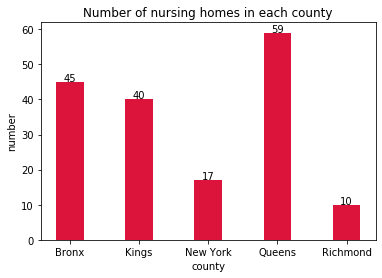

In [16]:
labels = list(distri_nursing_homes.index.values)
plt.xlabel('county')
plt.ylabel('number')
plt.bar(distri_nursing_homes.index.values,distri_nursing_homes['provider_name'],width=0.4,color='#DC143C')
plt.title("Number of nursing homes in each county")
x1 = distri_nursing_homes.index.values
y1 = distri_nursing_homes['provider_name']
for a,b in zip(x1,y1):
    plt.text(a, b-0.3,'%d'%b, ha = 'center',va = 'bottom',fontsize=10)
plt.show()

### As you can see, Queens has the most nursing homes with 59, while New York and Richmond have the fewest,with 17 and 10 respectively.

# 3. Trends in data on staff , residents and supplies 

### In this part, we want to determine the situation of nursing homes by looking at the changes of the whole and each county.

## 3.1 Trends in staff

### a.General Trend in NYC

In [17]:
# Removes rows with missing values
tsdf = df.dropna(subset=['staff_total_confirmed_covid'])
tsdf['staff_total_confirmed_covid'] = pd.to_numeric(tsdf['staff_total_confirmed_covid'])
tsdf = tsdf.pivot_table(index=['week_ending'],values='staff_total_confirmed_covid',aggfunc="sum")

/Users/fu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
tsdf.head()

,staff_total_confirmed_covid
week_ending,
2020-05-24,2191
2020-05-31,3320
2020-06-07,4224
2020-06-14,4716
2020-06-21,5218


/Users/fu/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


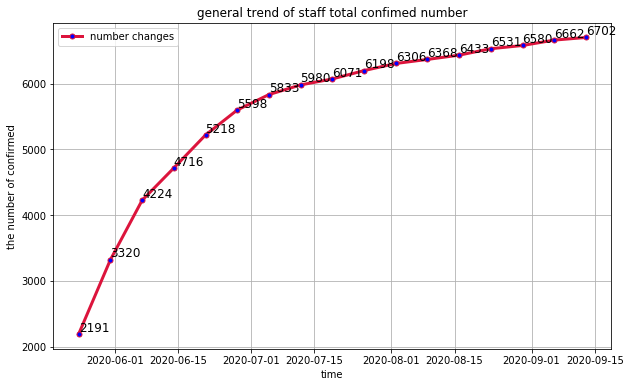

In [19]:
#Visualize the data above
import matplotlib.pyplot as plt
x2 = tsdf.index.values
y2 = tsdf['staff_total_confirmed_covid']
plt.figure(figsize=(10, 6))
plt.title("general trend of staff total confimed number")
plt.plot(x2, y2, label='number changes', linewidth=3, color='#DC143C', marker='o',
         markerfacecolor='blue', markersize=5)
plt.xlabel('time')
plt.ylabel('the number of confirmed')
plt.grid(True)
for a, b in zip(x2, y2):
    plt.text(a,b,b, ha='left', va='bottom', fontsize=12) 
plt.legend()
plt.show()

In [20]:
#the growth of  staff_total_confirmed_covid 
tsdf1 = tsdf.pct_change()
tsdf1['staff_total_confirmed_covid'] = round(tsdf1['staff_total_confirmed_covid'],2)

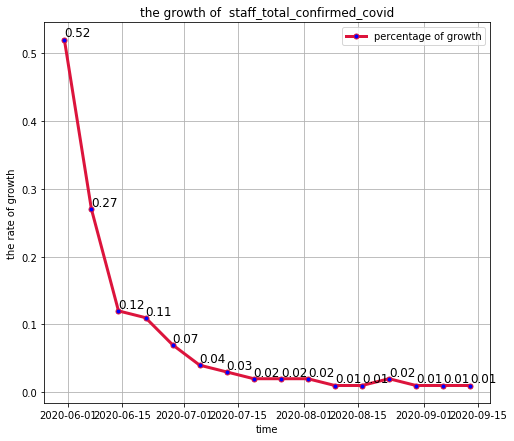

In [21]:
x3 = tsdf1.index.values
y3 = tsdf1['staff_total_confirmed_covid']
plt.figure(figsize=(8, 7))
plt.title("the growth of  staff_total_confirmed_covid")
plt.plot(x3, y3, label='percentage of growth', linewidth=3, color='#DC143C', marker='o',
         markerfacecolor='blue', markersize=5)
plt.xlabel('time')
plt.ylabel('the rate of growth')
plt.grid(True)
for a, b in zip(x3, y3):
    plt.text(a,b,b, ha='left', va='bottom', fontsize=12) 
plt.legend()
plt.show()

### As can be seen from the two graphs, although the number of confirmed employees increased sharply before July, it slowed down significantly after July, with an increase rate of only 1%. The rate of diagnosis after July has been better controlled.

### b. Each county trend in NYC

In [22]:
df_B["week_ending"] = pd.to_datetime(df_B["week_ending"])
df_B['staff_total_confirmed_covid'] = pd.to_numeric(df_B['staff_total_confirmed_covid'])
tsdf21 = df_B.pivot_table(index=['week_ending'],values='staff_total_confirmed_covid',aggfunc="sum")
df_K["week_ending"] = pd.to_datetime(df_K["week_ending"])
df_K['staff_total_confirmed_covid'] = pd.to_numeric(df_K['staff_total_confirmed_covid'])
tsdf22 = df_K.pivot_table(index=['week_ending'],values='staff_total_confirmed_covid',aggfunc="sum")
df_N["week_ending"] = pd.to_datetime(df_N["week_ending"])
df_N['staff_total_confirmed_covid'] = pd.to_numeric(df_N['staff_total_confirmed_covid'])
tsdf23 = df_N.pivot_table(index=['week_ending'],values='staff_total_confirmed_covid',aggfunc="sum")
df_Q["week_ending"] = pd.to_datetime(df_Q["week_ending"])
df_Q['staff_total_confirmed_covid'] = pd.to_numeric(df_Q['staff_total_confirmed_covid'])
tsdf24 = df_Q.pivot_table(index=['week_ending'],values='staff_total_confirmed_covid',aggfunc="sum")
df_R["week_ending"] = pd.to_datetime(df_R["week_ending"])
df_R['staff_total_confirmed_covid'] = pd.to_numeric(df_R['staff_total_confirmed_covid'])
tsdf25 = df_R.pivot_table(index=['week_ending'],values='staff_total_confirmed_covid',aggfunc="sum")

/Users/fu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/fu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/fu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

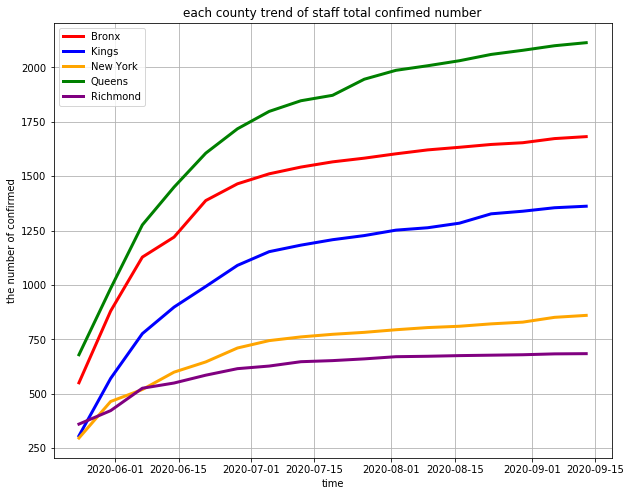

In [23]:
#Visualize the data above
import matplotlib.pyplot as plt
x41 = tsdf21.index.values
y41 = tsdf21['staff_total_confirmed_covid']
y42 = tsdf22['staff_total_confirmed_covid']
y43 = tsdf23['staff_total_confirmed_covid']
y44 = tsdf24['staff_total_confirmed_covid']
y45 = tsdf25['staff_total_confirmed_covid']
plt.figure(figsize=(10, 8))
plt.title("each county trend of staff total confimed number")
plt.plot(x41, y41, linewidth=3, color='red',label="Bronx")
plt.plot(x41, y42,  linewidth=3, color='blue',label="Kings")
plt.plot(x41, y43,  linewidth=3, color='orange',label="New York")
plt.plot(x41, y44,  linewidth=3, color='green',label="Queens")
plt.plot(x41, y45,  linewidth=3, color='purple',label="Richmond")
plt.xlabel('time')
plt.ylabel('the number of confirmed')
plt.grid(True)
plt.legend()
plt.show()

## 3.2 Trends in residents

### a. General Trend in NYC

In [24]:
# Removes rows with missing values
rtcdf = df.dropna(subset=['residents_total_confirmed'])
rtcdf['residents_total_confirmed'] = pd.to_numeric(rtcdf['residents_total_confirmed'])
rtcdf = rtcdf.pivot_table(index=['week_ending'],values='residents_total_confirmed',aggfunc="sum")

/Users/fu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
rtcdf.head()

,residents_total_confirmed
week_ending,
2020-05-24,3218
2020-05-31,3653
2020-06-07,4132
2020-06-14,4546
2020-06-21,4822


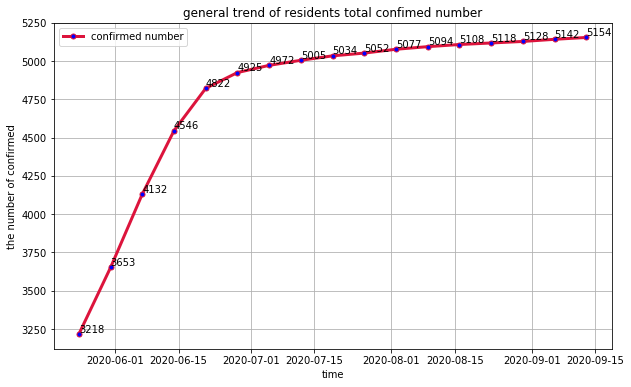

In [26]:
#Visualize the data above
import matplotlib.pyplot as plt
x5 = rtcdf.index.values
y5 =  rtcdf['residents_total_confirmed']
plt.figure(figsize=(10, 6))
plt.title("general trend of residents total confimed number")
plt.plot(x5, y5, label='confirmed number', linewidth=3, color='#DC143C', marker='o',
         markerfacecolor='blue', markersize=5)
plt.xlabel('time')
plt.ylabel('the number of confirmed')
plt.grid(True)
for a, b in zip(x5, y5):
    plt.text(a,b,b, ha='left', va='bottom', fontsize=10) 
plt.legend()
plt.show()

In [27]:
#the growth of  staff_total_confirmed_covid 
rtcdf1 = rtcdf.pct_change()
rtcdf1['residents_total_confirmed'] = round(rtcdf1['residents_total_confirmed'],3)

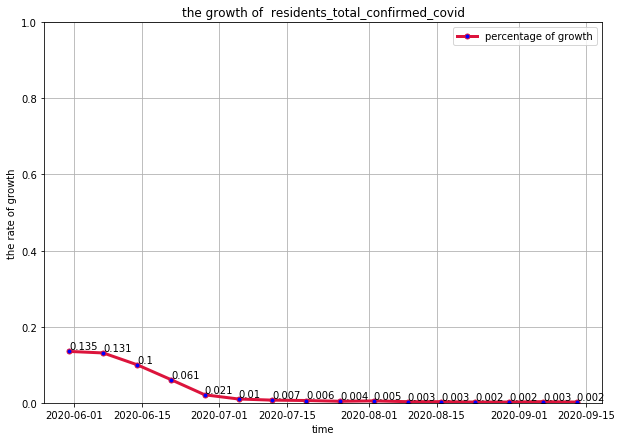

In [28]:
x6 =rtcdf1.index.values
y6 = rtcdf1['residents_total_confirmed']
plt.figure(figsize=(10, 7))
plt.title("the growth of  residents_total_confirmed_covid")
plt.plot(x6, y6, label='percentage of growth', linewidth=3, color='#DC143C', marker='o',
         markerfacecolor='blue', markersize=5)
plt.xlabel('time')
plt.ylabel('the rate of growth')
plt.ylim([0,1])
plt.grid(True)
for a, b in zip(x6, y6):
    plt.text(a,b,b, ha='left', va='bottom', fontsize=10) 
plt.legend()
plt.show()

### b. Each county trend in NYC

In [29]:
df_B['residents_total_confirmed'] = pd.to_numeric(df_B['residents_total_confirmed'])
rtcdf21 = df_B.pivot_table(index=['week_ending'],values='residents_total_confirmed',aggfunc="sum")

df_K['residents_total_confirmed']= pd.to_numeric(df_K['residents_total_confirmed'])
rtcdf22 = df_K.pivot_table(index=['week_ending'],values='residents_total_confirmed',aggfunc="sum")

df_N['residents_total_confirmed'] = pd.to_numeric(df_N['residents_total_confirmed'])
rtcdf23 = df_N.pivot_table(index=['week_ending'],values='residents_total_confirmed',aggfunc="sum")

df_Q['residents_total_confirmed']= pd.to_numeric(df_Q['residents_total_confirmed'])
rtcdf24 = df_Q.pivot_table(index=['week_ending'],values='residents_total_confirmed',aggfunc="sum")

df_R['residents_total_confirmed']= pd.to_numeric(df_R['residents_total_confirmed'])
rtcdf25 = df_R.pivot_table(index=['week_ending'],values='residents_total_confirmed',aggfunc="sum")

/Users/fu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/fu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/fu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

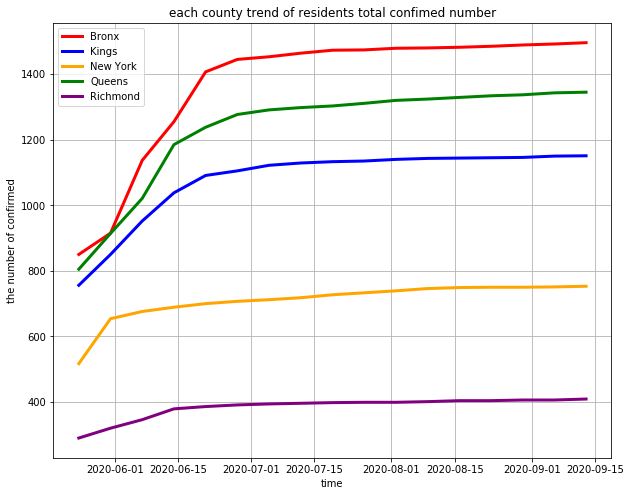

In [30]:
#Visualize the data above
import matplotlib.pyplot as plt
x7 = rtcdf21.index.values
y71 = rtcdf21['residents_total_confirmed']
y72 = rtcdf22['residents_total_confirmed']
y73 = rtcdf23['residents_total_confirmed']
y74 = rtcdf24['residents_total_confirmed']
y75 = rtcdf25['residents_total_confirmed']
plt.figure(figsize=(10, 8))
plt.title("each county trend of residents total confimed number")
plt.plot(x7, y71, linewidth=3, color='red',label="Bronx")
plt.plot(x7, y72,  linewidth=3, color='blue',label="Kings")
plt.plot(x7, y73,  linewidth=3, color='orange',label="New York")
plt.plot(x7, y74,  linewidth=3, color='green',label="Queens")
plt.plot(x7, y75,  linewidth=3, color='purple',label="Richmond")
plt.xlabel('time')
plt.ylabel('the number of confirmed')
plt.grid(True)
plt.legend()
plt.show()

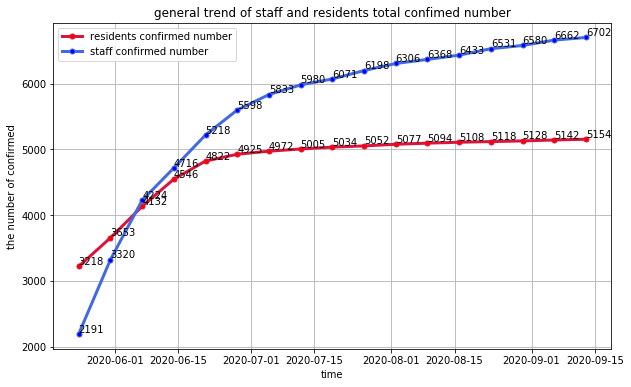

In [31]:
plt.figure(figsize=(10, 6))
plt.title("general trend of staff and residents total confimed number")
plt.plot(x5, y5, label='residents confirmed number', linewidth=3, color='#DC143C', marker='o',
         markerfacecolor='red', markersize=5)
plt.plot(x2, y2, label='staff confirmed number', linewidth=3, color='royalblue', marker='o',
         markerfacecolor='blue', markersize=5)
plt.xlabel('time')
plt.ylabel('the number of confirmed')
plt.grid(True)
for a, b in zip(x5, y5):
    plt.text(a,b,b, ha='left', va='bottom', fontsize=10) 
plt.grid(True)
for a, b in zip(x2, y2):
    plt.text(a,b,b, ha='left', va='bottom', fontsize=10) 
plt.legend()
plt.show()

## 3.2 Trends in supply

### a. masks supply in each county

In [32]:
mdf = df
mdf["one_week_supply_of_n95_masks"] = df["one_week_supply_of_n95_masks"].astype('str')
mdf1 = mdf.loc[mdf["one_week_supply_of_n95_masks"].str.contains('Y')]

mdf_B = mdf1[mdf1["county"].isin(["Bronx"])]
mdf_K = mdf1[mdf1["county"].isin(["Kings"])]
mdf_N = mdf1[mdf1["county"].isin(["New York"])]
mdf_Q = mdf1[mdf1["county"].isin(["Queens"])]
mdf_R = mdf1[mdf1["county"].isin(["Richmond"])]

In [33]:
#The percentages are based on the number of nursing homes in each county as calculated above
m_df_B =  mdf_B.pivot_table(index=['week_ending'],values='one_week_supply_of_n95_masks',aggfunc="count")
m_df_B["Percentage"] = m_df_B["one_week_supply_of_n95_masks"]/45

m_df_K =  mdf_K.pivot_table(index=['week_ending'],values='one_week_supply_of_n95_masks',aggfunc="count")
m_df_K["Percentage"] = m_df_K["one_week_supply_of_n95_masks"]/40

m_df_N =  mdf_N.pivot_table(index=['week_ending'],values='one_week_supply_of_n95_masks',aggfunc="count")
m_df_N["Percentage"] = m_df_N["one_week_supply_of_n95_masks"]/17

m_df_Q =  mdf_Q.pivot_table(index=['week_ending'],values='one_week_supply_of_n95_masks',aggfunc="count")
m_df_Q["Percentage"] = m_df_Q["one_week_supply_of_n95_masks"]/59

m_df_R =  mdf_R.pivot_table(index=['week_ending'],values='one_week_supply_of_n95_masks',aggfunc="count")
m_df_R["Percentage"] = m_df_R["one_week_supply_of_n95_masks"]/10

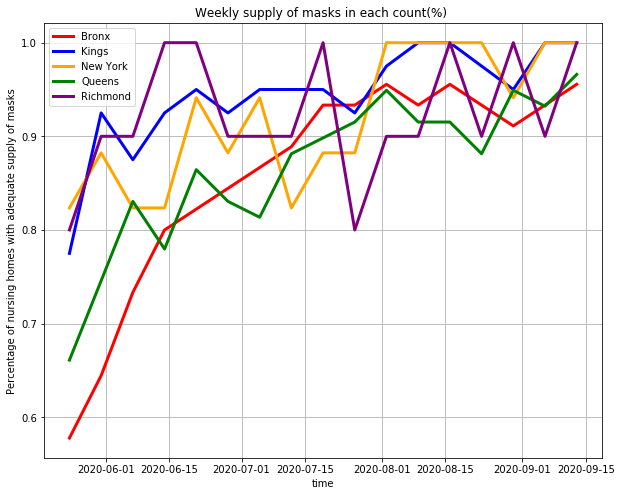

In [34]:
#Visualize the data above
import matplotlib.pyplot as plt
x8 = m_df_B.index.values
y81 = m_df_B["Percentage"]
y82 = m_df_K["Percentage"]
y83 = m_df_N["Percentage"]
y84 = m_df_Q["Percentage"]
y85 = m_df_R["Percentage"]
plt.figure(figsize=(10, 8))
plt.title("Weekly supply of masks in each count(%) ")
plt.plot(x8, y81, linewidth=3, color='red',label="Bronx")
plt.plot(x8, y82,  linewidth=3, color='blue',label="Kings")
plt.plot(x8, y83,  linewidth=3, color='orange',label="New York")
plt.plot(x8, y84,  linewidth=3, color='green',label="Queens")
plt.plot(x8, y85,  linewidth=3, color='purple',label="Richmond")
plt.xlabel('time')
plt.ylabel('Percentage of nursing homes with adequate supply of masks')
plt.grid(True)
plt.legend()
plt.show()

### b. surgical masks supply

In [35]:
mdf["one_week_supply_of_surgical"] = df["one_week_supply_of_surgical"].astype('str')
mdf2 = mdf.loc[mdf["one_week_supply_of_surgical"].str.contains('Y')]
smdf_B = mdf2[mdf2["county"].isin(["Bronx"])]
smdf_K = mdf2[mdf2["county"].isin(["Kings"])]
smdf_N = mdf2[mdf2["county"].isin(["New York"])]
smdf_Q = mdf2[mdf2["county"].isin(["Queens"])]
smdf_R = mdf2[mdf2["county"].isin(["Richmond"])]

In [36]:
sm_df_B =  smdf_B.pivot_table(index=['week_ending'],values='one_week_supply_of_surgical',aggfunc="count")
sm_df_B["Percentage"] = sm_df_B["one_week_supply_of_surgical"]/45

sm_df_K =  smdf_K.pivot_table(index=['week_ending'],values='one_week_supply_of_surgical',aggfunc="count")
sm_df_K["Percentage"] = sm_df_K["one_week_supply_of_surgical"]/40

sm_df_N =  smdf_N.pivot_table(index=['week_ending'],values='one_week_supply_of_surgical',aggfunc="count")
sm_df_N["Percentage"] = sm_df_N["one_week_supply_of_surgical"]/17

sm_df_Q =  smdf_Q.pivot_table(index=['week_ending'],values='one_week_supply_of_surgical',aggfunc="count")
sm_df_Q["Percentage"] = sm_df_Q["one_week_supply_of_surgical"]/59

sm_df_R =  smdf_R.pivot_table(index=['week_ending'],values='one_week_supply_of_surgical',aggfunc="count")
sm_df_R["Percentage"] = sm_df_R["one_week_supply_of_surgical"]/10

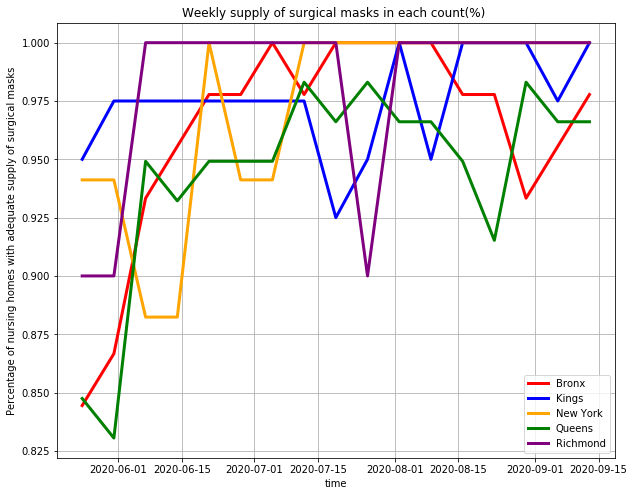

In [37]:
#Visualize the data above
import matplotlib.pyplot as plt
x9 = sm_df_B.index.values
y91 = sm_df_B["Percentage"]
y92 = sm_df_K["Percentage"]
y93 = sm_df_N["Percentage"]
y94 = sm_df_Q["Percentage"]
y95 = sm_df_R["Percentage"]
plt.figure(figsize=(10, 8))
plt.title("Weekly supply of surgical masks in each count(%) ")
plt.plot(x9, y91, linewidth=3, color='red',label="Bronx")
plt.plot(x9, y92,  linewidth=3, color='blue',label="Kings")
plt.plot(x9, y93,  linewidth=3, color='orange',label="New York")
plt.plot(x9, y94,  linewidth=3, color='green',label="Queens")
plt.plot(x9, y95,  linewidth=3, color='purple',label="Richmond")
plt.xlabel('time')
plt.ylabel('Percentage of nursing homes with adequate supply of surgical masks')
plt.grid(True)
plt.legend()
plt.show()

### g. total bed numbers and total number of occupied beds

In [38]:
tbdf = df.dropna(subset=['number_of_all_beds'])
tbodf = df.dropna(subset=['total_number_of_occupied'])
tbdf['number_of_all_beds'] = pd.to_numeric(tbdf['number_of_all_beds'])
tbodf['total_number_of_occupied'] = pd.to_numeric(tbodf['total_number_of_occupied'])
tbdf = tbdf.pivot_table(index=['week_ending'],values='number_of_all_beds',aggfunc="sum")
tbodf = tbodf.pivot_table(index=['week_ending'],values='total_number_of_occupied',aggfunc="sum")

/Users/fu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/fu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


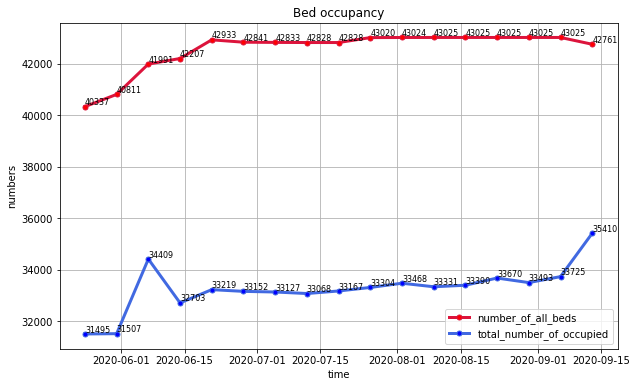

In [39]:
x_g = tbdf.index.values
y_g1 = tbdf['number_of_all_beds']
y_g2 = tbodf['total_number_of_occupied']
plt.figure(figsize=(10, 6))
plt.title("Bed occupancy")
plt.plot(x_g, y_g1, label='number_of_all_beds', linewidth=3, color='#DC143C', marker='o',
         markerfacecolor='red', markersize=5)
plt.plot(x_g, y_g2, label='total_number_of_occupied', linewidth=3, color='royalblue', marker='o',
         markerfacecolor='blue', markersize=5)
plt.xlabel('time')
plt.ylabel('numbers')
plt.grid(True)
for a, b in zip(x_g, y_g1):
    plt.text(a,b,b, ha='left', va='bottom', fontsize=8) 
plt.grid(True)
for a, b in zip(x_g, y_g2):
    plt.text(a,b,b, ha='left', va='bottom', fontsize=8) 
plt.legend()
plt.show()

In [40]:
tbdf['beds_occupied_rate'] = tbodf['total_number_of_occupied']/tbdf['number_of_all_beds']
tbdf['beds_occupied_rate'] = round(tbdf['beds_occupied_rate'],2)

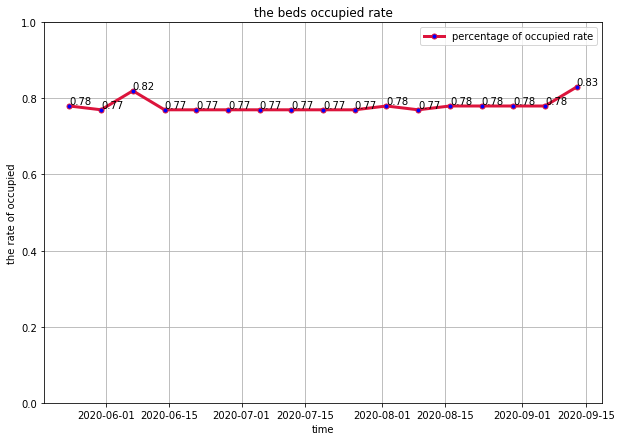

In [41]:
x_g = tbdf.index.values
y_g3 = tbdf['beds_occupied_rate']
plt.figure(figsize=(10, 7))
plt.title("the beds occupied rate")
plt.plot(x_g, y_g3, label='percentage of occupied rate', linewidth=3, color='#DC143C', marker='o',
         markerfacecolor='blue', markersize=5)
plt.xlabel('time')
plt.ylabel('the rate of occupied')
plt.ylim([0,1])
plt.grid(True)
for a, b in zip(x_g, y_g3):
    plt.text(a,b,b, ha='left', va='bottom', fontsize=10) 
plt.legend()
plt.show()

# 4. shortage of staff analysis

## 4.1 shortage of nursing_staff analysis

In [42]:
ns_df = df[df["shortage_of_nursing_staff"].isin(["Y"])]
cs_df = df[df["shortage_of_clinical_staff"].isin(["Y"])]
shortage_nursingdf = ns_df.pivot_table(index=['week_ending'],values='shortage_of_nursing_staff',aggfunc="count")
shortage_clinicaldf =  cs_df.pivot_table(index=['week_ending'],values='shortage_of_clinical_staff',aggfunc="count")

In [43]:
shortage_nursingdf["Percentage"] = shortage_nursingdf["shortage_of_nursing_staff"]/171
shortage_nursingdf["Percentage"] = round(shortage_nursingdf["Percentage"],2)
shortage_clinicaldf["Percentage"] = shortage_clinicaldf["shortage_of_clinical_staff"]/171
shortage_clinicaldf["Percentage"] = round(shortage_clinicaldf["Percentage"],2)

In [44]:
shortage_clinicaldf.head()

,shortage_of_clinical_staff,Percentage
week_ending,,
2020-05-24,9,0.05
2020-05-31,5,0.03
2020-06-07,9,0.05
2020-06-14,7,0.04
2020-06-21,4,0.02


In [45]:
shortage_nursingdf.head()

,shortage_of_nursing_staff,Percentage
week_ending,,
2020-05-24,32,0.19
2020-05-31,29,0.17
2020-06-07,38,0.22
2020-06-14,32,0.19
2020-06-21,25,0.15


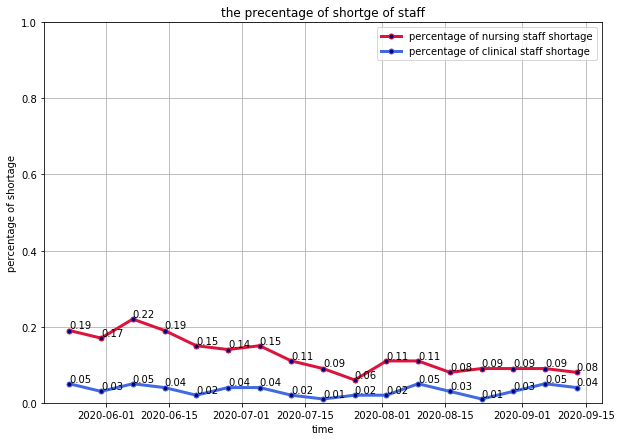

In [46]:
x14 =shortage_nursingdf.index.values
y14_1 = shortage_nursingdf["Percentage"]
y14_2 = shortage_clinicaldf["Percentage"]
plt.figure(figsize=(10, 7))
plt.title("the precentage of shortge of staff")
plt.plot(x14, y14_1, label='percentage of nursing staff shortage', linewidth=3, color='#DC143C', marker='o',
         markerfacecolor='navy', markersize=5)
plt.plot(x14, y14_2, label='percentage of clinical staff shortage', linewidth=3, color='royalblue', marker='o',
         markerfacecolor='navy', markersize=5)
plt.xlabel('time')
plt.ylabel('percentage of shortage')
plt.ylim([0,1])
plt.grid(True)
for a, b in zip(x14, y14_1):
    plt.text(a,b,b, ha='left', va='bottom', fontsize=10) 
for a, b in zip(x14, y14_2):
    plt.text(a,b,b, ha='left', va='bottom', fontsize=10) 
plt.legend(loc="upper right")
plt.show()

# 5. Death rate analysis

## 5.1 staffs death rate

In [47]:
df['staff_weekly_covid_19_deaths'] = pd.to_numeric(df['staff_weekly_covid_19_deaths'])
df['staff_weekly_confirmed_covid'] = pd.to_numeric(df['staff_weekly_confirmed_covid'])
dr_df = df.pivot_table(index=['week_ending'],values=['staff_weekly_covid_19_deaths','staff_weekly_confirmed_covid'],aggfunc="sum")
dr_df['staff_death_rate'] = dr_df['staff_weekly_covid_19_deaths']/dr_df['staff_weekly_confirmed_covid']
dr_df['staff_death_rate']= round(dr_df['staff_death_rate'],2)

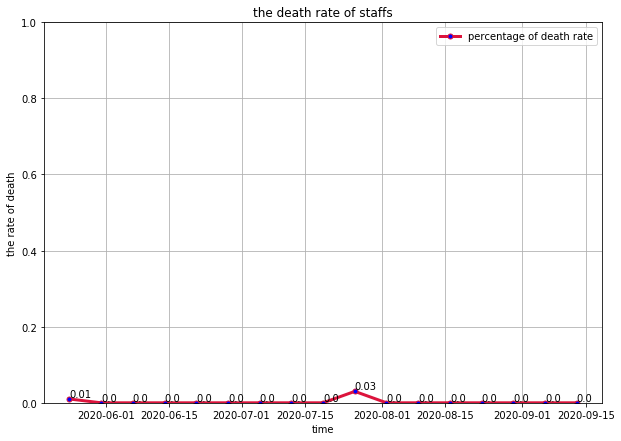

In [48]:
x_15 = dr_df.index.values
y_15 = dr_df['staff_death_rate']
plt.figure(figsize=(10, 7))
plt.title("the death rate of staffs")
plt.plot(x_15, y_15, label='percentage of death rate', linewidth=3, color='#DC143C', marker='o',
         markerfacecolor='blue', markersize=5)
plt.xlabel('time')
plt.ylabel('the rate of death')
plt.ylim([0,1])
plt.grid(True)
for a, b in zip(x_15, y_15):
    plt.text(a,b,b, ha='left', va='bottom', fontsize=10) 
plt.legend()
plt.show()

## 5.2 residents death rate

In [49]:
df['residents_weekly_all_deaths'] = pd.to_numeric(df['residents_weekly_all_deaths'])
df['residents_weekly_confirmed'] = pd.to_numeric(df['residents_weekly_confirmed'])
rr_df = df.pivot_table(index=['week_ending'],values='residents_weekly_all_deaths',aggfunc="sum")
rr_df1 = df.pivot_table(index=['week_ending'],values='residents_weekly_confirmed',aggfunc="sum")

### 5.3 Decline in numbers of weekly confirmed cases and deaths

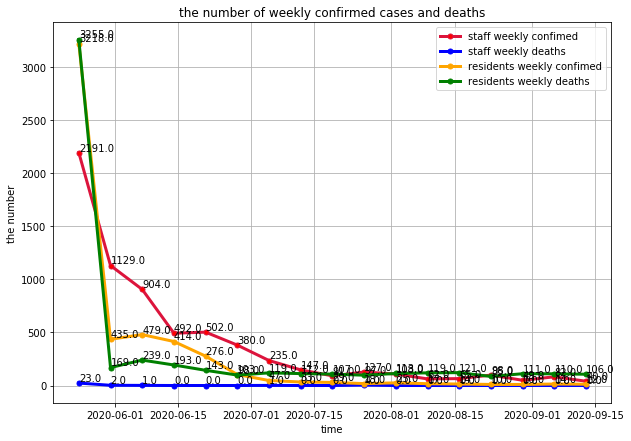

In [57]:
x_16 = dr_df.index.values
y_16_1 = dr_df['staff_weekly_confirmed_covid']
y_16_2 = dr_df['staff_weekly_covid_19_deaths']
y_16_3 = rr_df1['residents_weekly_confirmed']
y_16_4 = rr_df['residents_weekly_all_deaths']
plt.figure(figsize=(10, 7))
plt.title("the number of weekly confirmed cases and deaths")
plt.plot(x_16, y_16_1, label='staff weekly confimed', linewidth=3, color='#DC143C', marker='o',
         markerfacecolor='red', markersize=5)
plt.plot(x_16, y_16_2,label='staff weekly deaths',linewidth=3, color='blue',marker='o',
         markerfacecolor='blue', markersize=5)
plt.plot(x_16, y_16_3,label='residents weekly confimed', linewidth=3, color='orange',marker='o',
         markerfacecolor='orange', markersize=5)
plt.plot(x_16, y_16_4,label='residents weekly deaths', linewidth=3, color='green',marker='o',
         markerfacecolor='green', markersize=5)
plt.xlabel('time')
plt.ylabel('the number')
plt.grid(True)
for a, b in zip(x_16, y_16_1):
    plt.text(a,b,b, ha='left', va='bottom', fontsize=10) 
for a, b in zip(x_16, y_16_2):
    plt.text(a,b,b, ha='left', va='bottom', fontsize=10) 
for a, b in zip(x_16, y_16_3):
    plt.text(a,b,b, ha='left', va='bottom', fontsize=10) 
for a, b in zip(x_16, y_16_4):
    plt.text(a,b,b, ha='left', va='bottom', fontsize=10) 
plt.legend()
plt.show()

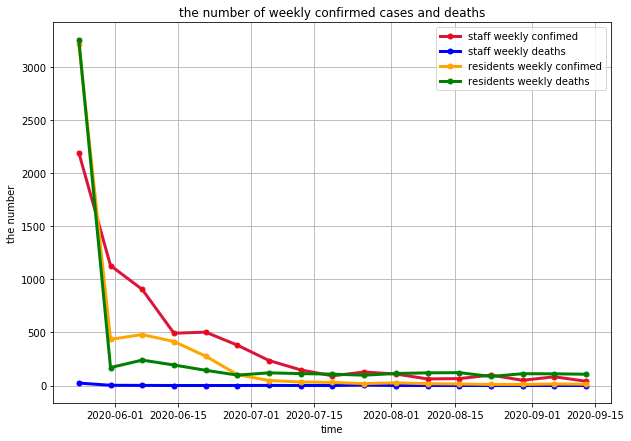

In [56]:
x_16 = dr_df.index.values
y_16_1 = dr_df['staff_weekly_confirmed_covid']
y_16_2 = dr_df['staff_weekly_covid_19_deaths']
y_16_3 = rr_df1['residents_weekly_confirmed']
y_16_4 = rr_df['residents_weekly_all_deaths']
plt.figure(figsize=(10, 7))
plt.title("the number of weekly confirmed cases and deaths")
plt.plot(x_16, y_16_1, label='staff weekly confimed', linewidth=3, color='#DC143C', marker='o',
         markerfacecolor='red', markersize=5)
plt.plot(x_16, y_16_2,label='staff weekly deaths',linewidth=3, color='blue',marker='o',
         markerfacecolor='blue', markersize=5)
plt.plot(x_16, y_16_3,label='residents weekly confimed', linewidth=3, color='orange',marker='o',
         markerfacecolor='orange', markersize=5)
plt.plot(x_16, y_16_4,label='residents weekly deaths', linewidth=3, color='green',marker='o',
         markerfacecolor='green', markersize=5)
plt.xlabel('time')
plt.ylabel('the number')
plt.grid(True)
plt.legend()
plt.show()

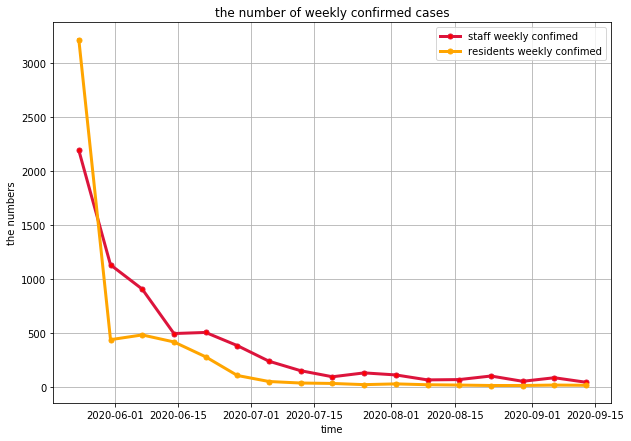

In [59]:
x_16 = dr_df.index.values
y_16_1 = dr_df['staff_weekly_confirmed_covid']
y_16_3 = rr_df1['residents_weekly_confirmed']
plt.figure(figsize=(10, 7))
plt.title("the number of weekly confirmed cases")
plt.plot(x_16, y_16_1, label='staff weekly confimed', linewidth=3, color='#DC143C', marker='o',
         markerfacecolor='red', markersize=5)
plt.plot(x_16, y_16_3,label='residents weekly confimed', linewidth=3, color='orange',marker='o',
         markerfacecolor='orange', markersize=5)
plt.xlabel('time')
plt.ylabel('the numbers')
plt.grid(True)
plt.legend()
plt.show()


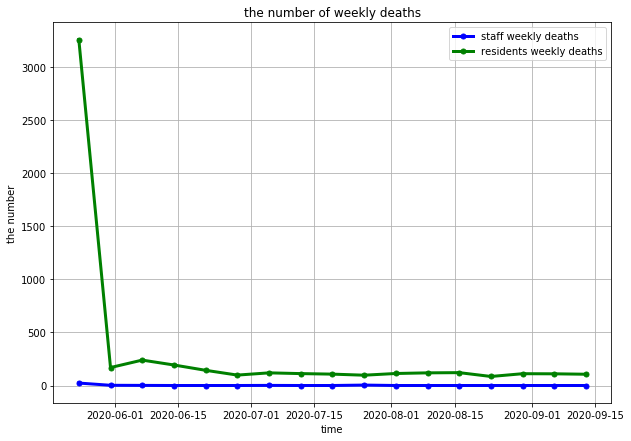

In [60]:
x_16 = dr_df.index.values
y_16_2 = dr_df['staff_weekly_covid_19_deaths']
y_16_4 = rr_df['residents_weekly_all_deaths']
plt.figure(figsize=(10, 7))
plt.title("the number of weekly deaths")
plt.plot(x_16, y_16_2,label='staff weekly deaths',linewidth=3, color='blue',marker='o',
         markerfacecolor='blue', markersize=5)
plt.plot(x_16, y_16_4,label='residents weekly deaths', linewidth=3, color='green',marker='o',
         markerfacecolor='green', markersize=5)
plt.xlabel('time')
plt.ylabel('the number')
plt.grid(True)
plt.legend()
plt.show()

# 6. The number of growth

## 6.1 staff

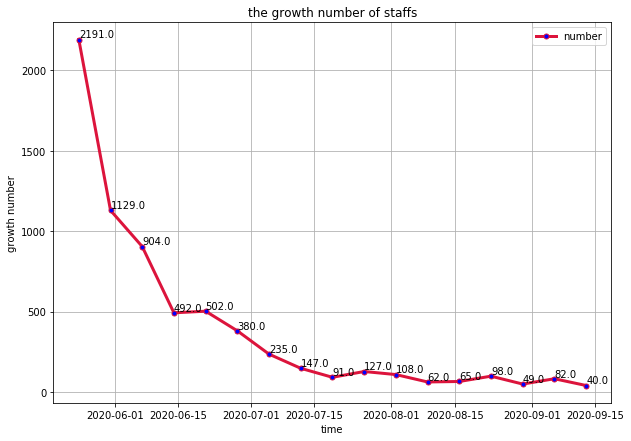

In [51]:
x_17 = dr_df.index.values
y_17 = dr_df['staff_weekly_confirmed_covid']
plt.figure(figsize=(10, 7))
plt.title("the growth number of staffs")
plt.plot(x_17, y_17, label='number', linewidth=3, color='#DC143C', marker='o',
         markerfacecolor='blue', markersize=5)
plt.xlabel('time')
plt.ylabel('growth number')
plt.grid(True)
for a, b in zip(x_17, y_17):
    plt.text(a,b,b, ha='left', va='bottom', fontsize=10) 
plt.legend()
plt.show()

## 6.2 residents

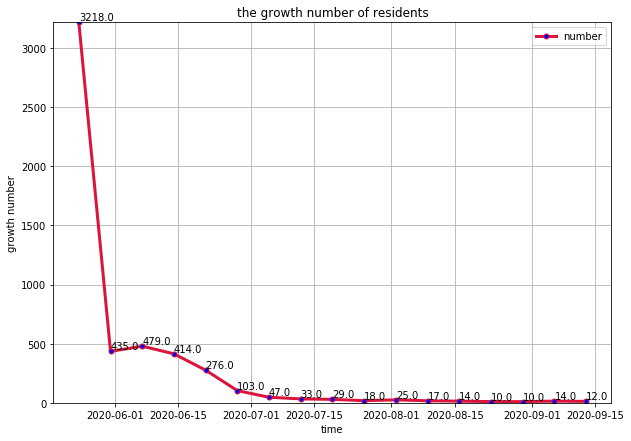

In [76]:
x_18 = rr_df1.index.values
y_18 = rr_df1['residents_weekly_confirmed'] 
plt.figure(figsize=(10, 7))
plt.title("the growth number of residents")
plt.plot(x_18, y_18, label='number', linewidth=3, color='#DC143C', marker='o',
         markerfacecolor='blue', markersize=5)
plt.xlabel('time')
plt.ylabel('growth number')
plt.ylim([0,3218])
plt.grid(True)
for a, b in zip(x_18, y_18):
    plt.text(a,b,b, ha='left', va='bottom', fontsize=10) 
plt.legend()
plt.show()

# 7. County performance in Covid19

In [141]:
#Counties are rated on five dimensions of performance, including availability of various supplies, staffing, data quality, number of confirmed residents per 1,000 and availability of tests. 
#The full mark is five.
#The missing value is filled with 0
countydf = df
#index1
countydf.one_week_supply_of_n95_masks = countydf.one_week_supply_of_n95_masks.replace(np.nan,'N')
countydf.one_week_supply_of_surgical = countydf.one_week_supply_of_surgical.replace(np.nan,'N')
countydf.one_week_supply_of_gloves = countydf.one_week_supply_of_gloves.replace(np.nan,'N')
countydf.one_week_supply_of_eye = countydf.one_week_supply_of_eye.replace(np.nan,'N')
countydf.one_week_supply_of_gowns = countydf.one_week_supply_of_gowns.replace(np.nan,'N')
countydf["index_1_1"] = countydf.one_week_supply_of_n95_masks.apply(lambda x: 0.2 if 'Y' in x else 0)
countydf["index_1_2"] = countydf.one_week_supply_of_surgical.apply(lambda x: 0.2 if 'Y' in x else 0)
countydf["index_1_3"] = countydf.one_week_supply_of_gloves.apply(lambda x: 0.2 if 'Y' in x else 0)
countydf["index_1_4"] = countydf.one_week_supply_of_eye.apply(lambda x: 0.2 if 'Y' in x else 0)
countydf["index_1_5"] = countydf.one_week_supply_of_gowns.apply(lambda x: 0.2 if 'Y' in x else 0)

In [142]:
#index2
countydf.shortage_of_nursing_staff = countydf.shortage_of_nursing_staff.replace(np.nan,'Y')
countydf.shortage_of_clinical_staff = countydf.shortage_of_clinical_staff.replace(np.nan,'Y')
countydf.shortage_of_aides = countydf.shortage_of_aides.replace(np.nan,'Y')
countydf.shortage_of_other_staff = countydf.shortage_of_other_staff.replace(np.nan,'Y')
countydf["index_2_1"] = countydf.shortage_of_nursing_staff.apply(lambda x: 0.25 if 'N' in x else 0)
countydf["index_2_2"] = countydf.shortage_of_clinical_staff.apply(lambda x: 0.25 if 'N' in x else 0)
countydf["index_2_3"] = countydf.shortage_of_aides.apply(lambda x: 0.25 if 'N' in x else 0)
countydf["index_2_4"] = countydf.shortage_of_other_staff.apply(lambda x: 0.25 if 'N' in x else 0)

In [143]:
#index3
countydf.passed_quality_assurance = countydf.passed_quality_assurance.replace(np.nan,'N')
countydf["index_3"] = countydf.passed_quality_assurance.apply(lambda x: 1 if 'Y' in x else 0)
#index4
countydf.resident_access_to_testing = countydf.resident_access_to_testing.replace(np.nan,'N')
countydf["index_4"] = countydf.resident_access_to_testing.apply(lambda x: 1 if 'Y' in x else 0)

In [144]:
#index5
countydf.total_resident_confirmed_covid_19_cases_per_1_000_residents = countydf.total_resident_confirmed_covid_19_cases_per_1_000_residents.replace("N",300)
countydf["total_resident_confirmed_covid_19_cases_per_1_000_residents"] = pd.to_numeric(countydf["total_resident_confirmed_covid_19_cases_per_1_000_residents"])
def func(x):
    if 0 <= x < 50:
        return 1
    if 50 <= x < 100:
        return 0.75
    if 100 <= x < 200:
        return 0.5
    if 200 <= x < 300:
        return 0.25
    else:
        return 0
countydf["index_5"] = countydf["total_resident_confirmed_covid_19_cases_per_1_000_residents"].apply(func)

In [145]:
countydf["index_1"] = countydf.apply(lambda x: x["index_1_1"]+x["index_1_3"]+x["index_1_2"]+x["index_1_4"]+x["index_1_5"] , axis=1)
countydf["index_2"] = countydf.apply(lambda x: x["index_2_1"]+x["index_2_2"]+x["index_2_3"]+x["index_2_4"] , axis=1)

In [146]:
countydf["score"] =  countydf.apply(lambda x: x["index_1"]+x["index_2"]+x["index_3"]+x["index_4"]+x["index_5"] , axis=1)

In [147]:
#From the beginning of the epidemic to the present, the average score of each county
score_df = df.pivot_table(index=['county'],values=['score','index_1','index_2','index_3','index_4','index_5'],aggfunc="mean")

In [148]:
score_df

,index_1,index_2,index_3,index_4,index_5,score
county,,,,,,
Bronx,0.926013,0.874510,0.943791,0.677124,0.560131,3.981569
Kings,0.945000,0.963603,0.985294,0.704412,0.609559,4.207868
New York,0.955709,0.865052,0.948097,0.702422,0.516436,3.987716
Queens,0.913858,0.879611,0.956132,0.645065,0.600199,3.994865
Richmond,0.948235,0.916176,0.982353,0.705882,0.619118,4.171765


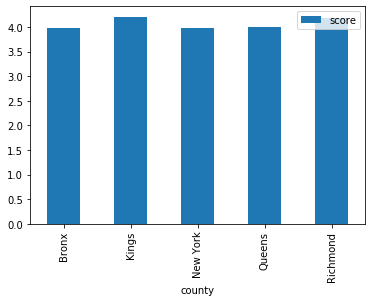

In [185]:
pltscore = pd.DataFrame(score_df['score'])
pltscore.plot.bar()

In [179]:
score_df.sort_values(by='score',ascending=False)

,index_1,index_2,index_3,index_4,index_5,score
county,,,,,,
Kings,0.945000,0.963603,0.985294,0.704412,0.609559,4.207868
Richmond,0.948235,0.916176,0.982353,0.705882,0.619118,4.171765
Queens,0.913858,0.879611,0.956132,0.645065,0.600199,3.994865
New York,0.955709,0.865052,0.948097,0.702422,0.516436,3.987716
Bronx,0.926013,0.874510,0.943791,0.677124,0.560131,3.981569


In [159]:
score_df.reset_index('county')

,county,index_1,index_2,index_3,index_4,index_5,score
0,Bronx,0.926013,0.874510,0.943791,0.677124,0.560131,3.981569
1,Kings,0.945000,0.963603,0.985294,0.704412,0.609559,4.207868
2,New York,0.955709,0.865052,0.948097,0.702422,0.516436,3.987716
3,Queens,0.913858,0.879611,0.956132,0.645065,0.600199,3.994865
4,Richmond,0.948235,0.916176,0.982353,0.705882,0.619118,4.171765


In [160]:
result = (score_df.reset_index('county')).ix[:,[0,1,2,3,4,5]]

/Users/fu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [161]:
result

,county,index_1,index_2,index_3,index_4,index_5
0,Bronx,0.926013,0.874510,0.943791,0.677124,0.560131
1,Kings,0.945000,0.963603,0.985294,0.704412,0.609559
2,New York,0.955709,0.865052,0.948097,0.702422,0.516436
3,Queens,0.913858,0.879611,0.956132,0.645065,0.600199
4,Richmond,0.948235,0.916176,0.982353,0.705882,0.619118


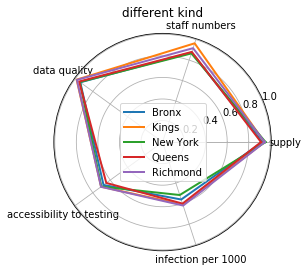

In [166]:
def result_pic(result):
   
    labels = ['supply', 'staff numbers', 'data quality', 'accessibility to testing', 'infection per 1000']
    kinds = list(result.iloc[:, 0])
    

    result = pd.concat([result, result[['index_1']]], axis=1)
    centers = np.array(result.iloc[:, 1:])

    n = len(labels)
    angle = np.linspace(0, 2 * np.pi, n, endpoint=False)
    angle = np.concatenate((angle, [angle[0]]))

    fig = plt.figure()
    ax = fig.add_subplot(111, polar=True)

    for i in range(len(kinds)):
        ax.plot(angle, centers[i], linewidth=2, label=kinds[i])

    ax.set_thetagrids(angle * 180 / np.pi, labels)
    plt.title('different kind')
    plt.legend(loc='center')
    plt.show()

result_pic(result)

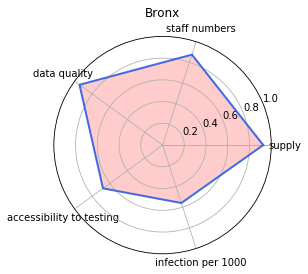

In [172]:
labels_1 = np.array(['supply', 'staff numbers', 'data quality', 'accessibility to testing', 'infection per 1000'])
dataLenth = 5
data1 = np.array([0.926013,0.874510,0.943791,0.677124,0.560131])
angles1 = np.linspace(0, 2*np.pi, dataLenth, endpoint=False)
data1 = np.concatenate((data1, [data1[0]]))
angles1 = np.concatenate((angles1, [angles1[0]]))

fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles1, data1, 'royalblue', linewidth=2)
ax.fill(angles1, data1, facecolor='r', alpha=0.2)
ax.set_thetagrids(angles1 * 180/np.pi, labels_1)
ax.set_title("Bronx", va='bottom')
ax.set_rlim(0,1)
ax.grid(True)
plt.show()

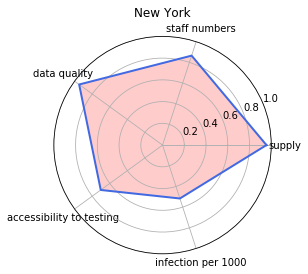

In [174]:
labels_2 = np.array(['supply', 'staff numbers', 'data quality', 'accessibility to testing', 'infection per 1000'])
dataLenth = 5
data2 = np.array([0.955709,0.865052,0.948097,0.702422,0.516436])
angles2 = np.linspace(0, 2*np.pi, dataLenth, endpoint=False)
data2 = np.concatenate((data2, [data2[0]]))
angles2 = np.concatenate((angles2, [angles2[0]]))

fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles2, data2, 'royalblue', linewidth=2)
ax.fill(angles2, data2, facecolor='r', alpha=0.2)
ax.set_thetagrids(angles2 * 180/np.pi, labels_2)
ax.set_title("New York", va='bottom')
ax.set_rlim(0,1)
ax.grid(True)
plt.show()

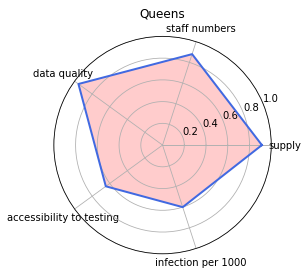

In [177]:
labels_3 = np.array(['supply', 'staff numbers', 'data quality', 'accessibility to testing', 'infection per 1000'])
dataLenth = 5
data3 = np.array([0.913858,0.879611,0.956132,0.645065,0.600199])
angles3 = np.linspace(0, 2*np.pi, dataLenth, endpoint=False)
data3 = np.concatenate((data3, [data3[0]]))
angles3 = np.concatenate((angles3, [angles3[0]]))

fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles3, data3, 'royalblue', linewidth=2)
ax.fill(angles3, data3, facecolor='r', alpha=0.2)
ax.set_thetagrids(angles3 * 180/np.pi, labels_3)
ax.set_title("Queens", va='bottom')
ax.set_rlim(0,1)
ax.grid(True)
plt.show()